In [27]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score 

In [34]:
df = pd.read_csv('./valid_preds/valid_preds_Jul10_21-36-05.csv')
df.head()

,image_id,data_provider,isup_grade,gleason_score,pred,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5
0,003d4dd6bd61221ebc0bfb9350db333f,karolinska,1,3+3,1,0.312,0.626,0.047,0.004,0.006,0.006
1,0068d4c7529e34fd4c9da863ce01a161,radboud,3,4+3,0,0.939,0.050,0.007,0.003,0.001,0.001
2,007433133235efc27a39f11df6940829,radboud,0,negative,0,0.995,0.004,0.001,0.000,0.000,0.000
3,00951a7fad040bf7e90f32e81fc0746f,radboud,1,3+3,1,0.127,0.753,0.097,0.019,0.002,0.002
4,00c52cb4db1c7a5811a8f070a910c038,radboud,5,4+5,4,0.000,0.001,0.004,0.057,0.937,0.001


In [35]:
cohen_kappa_score(df.isup_grade, df.pred, weights='quadratic')

0.7725608359971049

In [36]:
site = 'karolinska'
cohen_kappa_score(df.isup_grade[df.data_provider == site], df.pred[df.data_provider == site], weights='quadratic')

0.7693285978649154

In [37]:
site = 'radboud'
cohen_kappa_score(df.isup_grade[df.data_provider == site], df.pred[df.data_provider == site], weights='quadratic')

0.7324233822283529

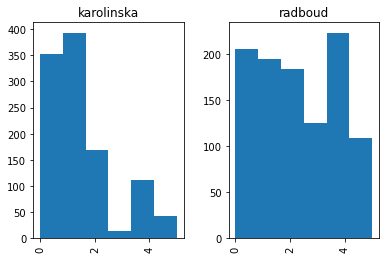

In [38]:
df.hist(column='pred', by='data_provider', bins=6);

### Normalized by site

In [9]:
df = pd.read_csv('./valid_preds/valid_preds_Jul11_02-29-09.csv')

In [10]:
cohen_kappa_score(df.isup_grade, df.pred, weights='quadratic')

0.7731684106401698

In [11]:
site = 'karolinska'
cohen_kappa_score(df.isup_grade[df.data_provider == site], df.pred[df.data_provider == site], weights='quadratic')

0.7485564033373924

In [12]:
site = 'radboud'
cohen_kappa_score(df.isup_grade[df.data_provider == site], df.pred[df.data_provider == site], weights='quadratic')

0.7385913061572074

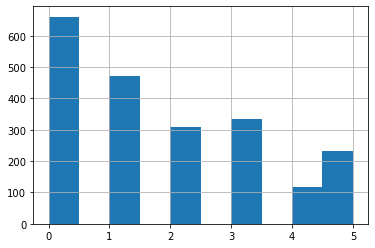

In [30]:
df.pred.hist();

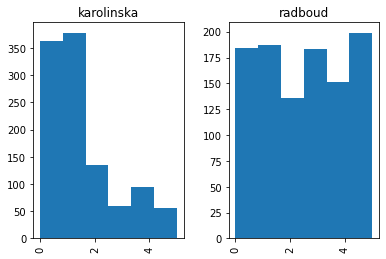

In [31]:
df.hist(column='isup_grade', by='data_provider', bins=6);

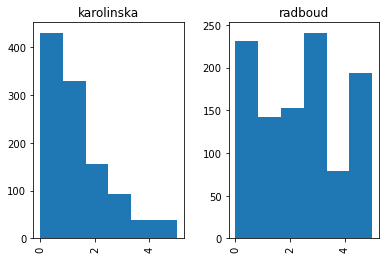

In [33]:
df.hist(column='pred', by='data_provider', bins=6);

### Regression

### Residuals

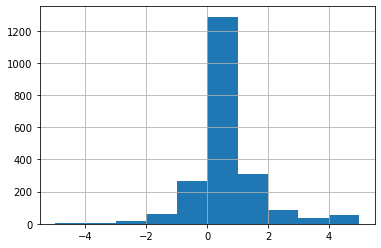

In [13]:
residuals = df.isup_grade - df.pred
residuals.hist()

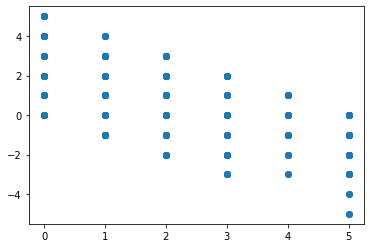

In [16]:
plt.scatter(df.pred, residuals)

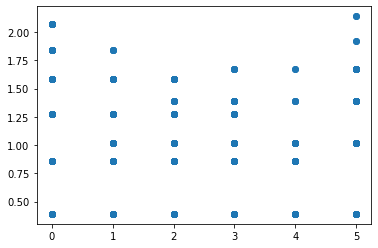

In [26]:
plt.scatter(df.pred, np.sqrt(np.abs((residuals - residuals.mean()) / residuals.std())))

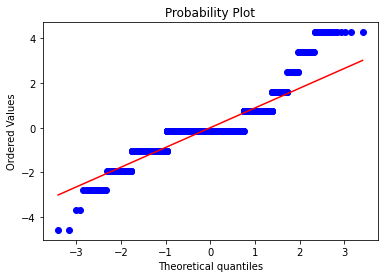

In [29]:
stats.probplot((residuals - residuals.mean()) / residuals.std(), plot=plt);